# Part 1 : Data Engineering

# Objective of this notebook :

 Data Cleaning : Look at the missing values and how you can impute them. ( Dates and times, Filling factor)
- Compute a few descriptive statistics.
- Compute features.
- Challenges descriptions.
- Some insight and visualization of your findings.

In [231]:
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [118]:
from pylab import rcParams
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed

# Data Analysis and Cleaning

First, we import all the datasets needed for this kernel.The required time series column is imported as a time column using the parse_dates parameter and is also selected as the dataframe index using the index_col parameter.

GlobalLandTemperaturesByCity :

In [119]:
GlobalLandTemperaturesByCity = pd.read_csv('GlobalLandTemperaturesByCity.csv')
GlobalLandTemperaturesByCity.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [120]:
GlobalLandTemperaturesByCity.shape

(8599212, 7)

In [121]:
GlobalLandTemperaturesByCity.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [122]:
GlobalLandTemperaturesByCity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [123]:
GlobalLandTemperaturesByCity.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [124]:
GlobalLandTemperaturesByCity.dropna(inplace=True)

In [125]:
GlobalLandTemperaturesByCity.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [126]:
GlobalLandTemperaturesByCity.shape

(8235082, 7)

In [127]:
GlobalLandTemperaturesByCity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8235082 entries, 0 to 8599210
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 502.6+ MB


In [128]:
#Fonction pour changer le format des données temporelles
def change_into_datetime(df,col):
    df[col]=pd.to_datetime(df[col])
    
#Fonction pour ajouter des colonnes: jour, mois, année
def display_timedata(df,col):
    df["day"]=df[col].dt.day
    df["month"]=df[col].dt.month
    df["year"]=df[col].dt.year

In [129]:
change_into_datetime(GlobalLandTemperaturesByCity,"dt")
display_timedata(GlobalLandTemperaturesByCity,"dt")

In [130]:
GlobalLandTemperaturesByCity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8235082 entries, 0 to 8599210
Data columns (total 10 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   dt                             datetime64[ns]
 1   AverageTemperature             float64       
 2   AverageTemperatureUncertainty  float64       
 3   City                           object        
 4   Country                        object        
 5   Latitude                       object        
 6   Longitude                      object        
 7   day                            int64         
 8   month                          int64         
 9   year                           int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 691.1+ MB


In [131]:
GlobalLandTemperaturesByCity.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,day,month,year
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,1,11,1743
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E,1,4,1744
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E,1,5,1744
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E,1,6,1744
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E,1,7,1744


GlobalLandTemperaturesByCountry

In [132]:
GlobalLandTemperaturesByCountry = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
GlobalLandTemperaturesByCountry.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [133]:
GlobalLandTemperaturesByCountry.shape

(577462, 4)

In [134]:
GlobalLandTemperaturesByCountry.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [135]:
GlobalLandTemperaturesByCountry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [136]:
GlobalLandTemperaturesByCountry.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [137]:
GlobalLandTemperaturesByCountry.dropna(inplace=True)

In [138]:
GlobalLandTemperaturesByCountry.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [139]:
GlobalLandTemperaturesByCountry.shape

(544811, 4)

In [140]:
GlobalLandTemperaturesByCountry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544811 entries, 0 to 577460
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             544811 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  544811 non-null  float64
 3   Country                        544811 non-null  object 
dtypes: float64(2), object(2)
memory usage: 20.8+ MB


In [141]:
#Fonction pour changer le format des données temporelles
def change_into_datetime(df,col):
    df[col]=pd.to_datetime(df[col])
    
#Fonction pour ajouter des colonnes: jour, mois, année
def display_timedata(df,col):
    df["day"]=df[col].dt.day
    df["month"]=df[col].dt.month
    df["year"]=df[col].dt.year

In [142]:
change_into_datetime(GlobalLandTemperaturesByCountry,"dt")
display_timedata(GlobalLandTemperaturesByCountry,"dt")

In [143]:
GlobalLandTemperaturesByCountry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544811 entries, 0 to 577460
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             544811 non-null  datetime64[ns]
 1   AverageTemperature             544811 non-null  float64       
 2   AverageTemperatureUncertainty  544811 non-null  float64       
 3   Country                        544811 non-null  object        
 4   day                            544811 non-null  int64         
 5   month                          544811 non-null  int64         
 6   year                           544811 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 33.3+ MB


In [144]:
GlobalLandTemperaturesByCountry.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,day,month,year
0,1743-11-01,4.384,2.294,Åland,1,11,1743
5,1744-04-01,1.530,4.680,Åland,1,4,1744
6,1744-05-01,6.702,1.789,Åland,1,5,1744
7,1744-06-01,11.609,1.577,Åland,1,6,1744
8,1744-07-01,15.342,1.410,Åland,1,7,1744


GlobalLandTemperaturesByMajorCity:

In [145]:
GlobalLandTemperaturesByMajorCity = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
GlobalLandTemperaturesByMajorCity.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [146]:
GlobalLandTemperaturesByMajorCity.shape

(239177, 7)

In [147]:
GlobalLandTemperaturesByMajorCity.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


In [148]:
GlobalLandTemperaturesByMajorCity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


In [149]:
GlobalLandTemperaturesByMajorCity.isnull().sum()

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [150]:
GlobalLandTemperaturesByMajorCity.dropna(inplace=True)

In [151]:
GlobalLandTemperaturesByMajorCity.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [152]:
GlobalLandTemperaturesByMajorCity.shape

(228175, 7)

In [153]:
GlobalLandTemperaturesByMajorCity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228175 entries, 0 to 239175
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             228175 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           228175 non-null  object 
 4   Country                        228175 non-null  object 
 5   Latitude                       228175 non-null  object 
 6   Longitude                      228175 non-null  object 
dtypes: float64(2), object(5)
memory usage: 13.9+ MB


In [154]:
#Fonction pour changer le format des données temporelles
def change_into_datetime(df,col):
    df[col]=pd.to_datetime(df[col])
    
#Fonction pour ajouter des colonnes: jour, mois, année
def display_timedata(df,col):
    df["day"]=df[col].dt.day
    df["month"]=df[col].dt.month
    df["year"]=df[col].dt.year

In [155]:
change_into_datetime(GlobalLandTemperaturesByMajorCity,"dt")
display_timedata(GlobalLandTemperaturesByMajorCity,"dt")

In [156]:
GlobalLandTemperaturesByMajorCity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228175 entries, 0 to 239175
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             228175 non-null  datetime64[ns]
 1   AverageTemperature             228175 non-null  float64       
 2   AverageTemperatureUncertainty  228175 non-null  float64       
 3   City                           228175 non-null  object        
 4   Country                        228175 non-null  object        
 5   Latitude                       228175 non-null  object        
 6   Longitude                      228175 non-null  object        
 7   day                            228175 non-null  int64         
 8   month                          228175 non-null  int64         
 9   year                           228175 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 

In [157]:
GlobalLandTemperaturesByMajorCity.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,day,month,year
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1,1,1849
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,1,2,1849
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,1,3,1849
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,1,4,1849
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,1,5,1849


GlobalLandTemperaturesByState:

In [158]:
GlobalLandTemperaturesByState = pd.read_csv('GlobalLandTemperaturesByState.csv')
GlobalLandTemperaturesByState.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [159]:
GlobalLandTemperaturesByState.shape

(645675, 5)

In [160]:
GlobalLandTemperaturesByState.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,620027.000000,620027.000000
mean,8.993111,1.287647
std,13.772150,1.360392
min,-45.389000,0.036000
25%,-0.693000,0.316000
50%,11.199000,0.656000
75%,19.899000,1.850000
max,36.339000,12.646000


In [161]:
GlobalLandTemperaturesByState.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             645675 non-null  object 
 1   AverageTemperature             620027 non-null  float64
 2   AverageTemperatureUncertainty  620027 non-null  float64
 3   State                          645675 non-null  object 
 4   Country                        645675 non-null  object 
dtypes: float64(2), object(3)
memory usage: 24.6+ MB


In [162]:
GlobalLandTemperaturesByState.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [163]:
GlobalLandTemperaturesByState.dropna(inplace=True)

In [164]:
GlobalLandTemperaturesByState.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
State                            0
Country                          0
dtype: int64

In [165]:
GlobalLandTemperaturesByState.shape

(620027, 5)

In [166]:
GlobalLandTemperaturesByState.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620027 entries, 0 to 645673
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             620027 non-null  object 
 1   AverageTemperature             620027 non-null  float64
 2   AverageTemperatureUncertainty  620027 non-null  float64
 3   State                          620027 non-null  object 
 4   Country                        620027 non-null  object 
dtypes: float64(2), object(3)
memory usage: 28.4+ MB


In [167]:
#Fonction pour changer le format des données temporelles
def change_into_datetime(df,col):
    df[col]=pd.to_datetime(df[col])
    
#Fonction pour ajouter des colonnes: jour, mois, année
def display_timedata(df,col):
    df["day"]=df[col].dt.day
    df["month"]=df[col].dt.month
    df["year"]=df[col].dt.year

In [168]:
change_into_datetime(GlobalLandTemperaturesByState,"dt")
display_timedata(GlobalLandTemperaturesByState,"dt")

In [169]:
GlobalLandTemperaturesByState.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620027 entries, 0 to 645673
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             620027 non-null  datetime64[ns]
 1   AverageTemperature             620027 non-null  float64       
 2   AverageTemperatureUncertainty  620027 non-null  float64       
 3   State                          620027 non-null  object        
 4   Country                        620027 non-null  object        
 5   day                            620027 non-null  int64         
 6   month                          620027 non-null  int64         
 7   year                           620027 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 42.6+ MB


In [170]:
GlobalLandTemperaturesByState.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,day,month,year
0,1855-05-01,25.544,1.171,Acre,Brazil,1,5,1855
1,1855-06-01,24.228,1.103,Acre,Brazil,1,6,1855
2,1855-07-01,24.371,1.044,Acre,Brazil,1,7,1855
3,1855-08-01,25.427,1.073,Acre,Brazil,1,8,1855
4,1855-09-01,25.675,1.014,Acre,Brazil,1,9,1855


In [171]:
#Températures globales
GlobalTemperatures = pd.read_csv('GlobalTemperatures.csv')
GlobalTemperatures.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
GlobalTemperatures.shape

(3192, 9)

In [173]:
GlobalTemperatures.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [174]:
GlobalTemperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [175]:
GlobalTemperatures.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [176]:
GlobalTemperatures.dropna(inplace=True)

In [177]:
GlobalTemperatures.isnull().sum()

dt                                           0
LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
dtype: int64

In [178]:
GlobalTemperatures.shape

(1992, 9)

In [179]:
GlobalTemperatures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 1200 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         1992 non-null   object 
 1   LandAverageTemperature                     1992 non-null   float64
 2   LandAverageTemperatureUncertainty          1992 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 155.6+ KB


In [180]:
#Fonction pour changer le format des données temporelles
def change_into_datetime(df,col):
    df[col]=pd.to_datetime(df[col])
    
#Fonction pour ajouter des colonnes: jour, mois, année
def display_timedata(df,col):
    df["day"]=df[col].dt.day
    df["month"]=df[col].dt.month
    df["year"]=df[col].dt.year

In [181]:
change_into_datetime(GlobalTemperatures,"dt")
display_timedata(GlobalTemperatures,"dt")

In [182]:
GlobalTemperatures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 1200 to 3191
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   dt                                         1992 non-null   datetime64[ns]
 1   LandAverageTemperature                     1992 non-null   float64       
 2   LandAverageTemperatureUncertainty          1992 non-null   float64       
 3   LandMaxTemperature                         1992 non-null   float64       
 4   LandMaxTemperatureUncertainty              1992 non-null   float64       
 5   LandMinTemperature                         1992 non-null   float64       
 6   LandMinTemperatureUncertainty              1992 non-null   float64       
 7   LandAndOceanAverageTemperature             1992 non-null   float64       
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64       
 9   day             

In [183]:
GlobalTemperatures.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,day,month,year
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1,1,1850
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,1,2,1850
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,1,3,1850
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,1,4,1850
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,1,5,1850


In [184]:
#df1------------------------------ GlobalLandTemperaturesByCity --------------------------------------------
GlobalLandTemperaturesByCity.name ="GlobalLandTemperaturesByCity"
df1 = pd.DataFrame(GlobalLandTemperaturesByCity)
print(df1)

                dt  AverageTemperature  AverageTemperatureUncertainty    City  \
0       1743-11-01               6.068                          1.737   Århus   
5       1744-04-01               5.788                          3.624   Århus   
6       1744-05-01              10.644                          1.283   Århus   
7       1744-06-01              14.051                          1.347   Århus   
8       1744-07-01              16.082                          1.396   Århus   
...            ...                 ...                            ...     ...   
8599206 2013-04-01               7.710                          0.182  Zwolle   
8599207 2013-05-01              11.464                          0.236  Zwolle   
8599208 2013-06-01              15.043                          0.261  Zwolle   
8599209 2013-07-01              18.775                          0.193  Zwolle   
8599210 2013-08-01              18.025                          0.298  Zwolle   

             Country Latitu

In [185]:
Morocco_df1 = df1[df1["Country"]=="Morocco"]
Morocco_df1 = Morocco_df1[Morocco_df1["month"]==1]
Morocco_df1 = Morocco_df1[Morocco_df1["day"]==1]

In [186]:
Morocco_df1.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,day,month,year
92984,1787-01-01,13.497,2.828,Agadir,Morocco,29.74N,9.23W,1,1,1787
93020,1790-01-01,12.164,3.775,Agadir,Morocco,29.74N,9.23W,1,1,1790
93032,1791-01-01,12.894,5.649,Agadir,Morocco,29.74N,9.23W,1,1,1791
93044,1792-01-01,10.837,4.012,Agadir,Morocco,29.74N,9.23W,1,1,1792
93068,1794-01-01,12.226,2.967,Agadir,Morocco,29.74N,9.23W,1,1,1794


In [187]:
Morocco_df1.shape

(2464, 10)

In [188]:
ts1 = Morocco_df1.set_index(["dt"])
ts1

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,day,month,year
dt,,,,,,,,,
1787-01-01,13.497,2.828,Agadir,Morocco,29.74N,9.23W,1,1,1787
1790-01-01,12.164,3.775,Agadir,Morocco,29.74N,9.23W,1,1,1790
1791-01-01,12.894,5.649,Agadir,Morocco,29.74N,9.23W,1,1,1791
1792-01-01,10.837,4.012,Agadir,Morocco,29.74N,9.23W,1,1,1792
1794-01-01,12.226,2.967,Agadir,Morocco,29.74N,9.23W,1,1,1794
...,...,...,...,...,...,...,...,...,...
2009-01-01,11.240,0.326,Tangier,Morocco,36.17N,5.97W,1,1,2009
2010-01-01,12.927,0.456,Tangier,Morocco,36.17N,5.97W,1,1,2010
2011-01-01,12.766,0.231,Tangier,Morocco,36.17N,5.97W,1,1,2011


In [189]:
#df2------------------------------ GlobalLandTemperaturesByCountry --------------------------------------------
GlobalLandTemperaturesByCountry.name ="GlobalLandTemperaturesByCountry"
df2 = pd.DataFrame(GlobalLandTemperaturesByCountry)
print(df2)

               dt  AverageTemperature  AverageTemperatureUncertainty  \
0      1743-11-01               4.384                          2.294   
5      1744-04-01               1.530                          4.680   
6      1744-05-01               6.702                          1.789   
7      1744-06-01              11.609                          1.577   
8      1744-07-01              15.342                          1.410   
...           ...                 ...                            ...   
577456 2013-04-01              21.142                          0.495   
577457 2013-05-01              19.059                          1.022   
577458 2013-06-01              17.613                          0.473   
577459 2013-07-01              17.000                          0.453   
577460 2013-08-01              19.759                          0.717   

         Country  day  month  year  
0          Åland    1     11  1743  
5          Åland    1      4  1744  
6          Åland    1   

In [190]:
Morocco_df2 = df2[df2["Country"]=="Morocco"]
Morocco_df2 = Morocco_df2[Morocco_df2["month"]==1]
Morocco_df2 = Morocco_df2[Morocco_df2["day"]==1]

In [191]:
Morocco_df2.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,day,month,year
354895,1787-01-01,11.298,3.016,Morocco,1,1,1787
354931,1790-01-01,10.027,4.096,Morocco,1,1,1790
354943,1791-01-01,10.924,6.215,Morocco,1,1,1791
354955,1792-01-01,9.309,4.250,Morocco,1,1,1792
354967,1793-01-01,7.720,3.171,Morocco,1,1,1793


In [192]:
Morocco_df2.shape

(225, 7)

In [193]:
ts2 = Morocco_df2.set_index(["dt"])
ts2

,AverageTemperature,AverageTemperatureUncertainty,Country,day,month,year
dt,,,,,,
1787-01-01,11.298,3.016,Morocco,1,1,1787
1790-01-01,10.027,4.096,Morocco,1,1,1790
1791-01-01,10.924,6.215,Morocco,1,1,1791
1792-01-01,9.309,4.250,Morocco,1,1,1792
1793-01-01,7.720,3.171,Morocco,1,1,1793
...,...,...,...,...,...,...
2009-01-01,9.221,0.325,Morocco,1,1,2009
2010-01-01,11.675,0.439,Morocco,1,1,2010
2011-01-01,11.256,0.341,Morocco,1,1,2011


In [194]:
#df3------------------------------ GlobalLandTemperaturesByMajorCity --------------------------------------------
GlobalLandTemperaturesByMajorCity.name ="GlobalLandTemperaturesByMajorCity"
df3 = pd.DataFrame(GlobalLandTemperaturesByMajorCity)
print(df3)

               dt  AverageTemperature  AverageTemperatureUncertainty     City  \
0      1849-01-01              26.704                          1.435  Abidjan   
1      1849-02-01              27.434                          1.362  Abidjan   
2      1849-03-01              28.101                          1.612  Abidjan   
3      1849-04-01              26.140                          1.387  Abidjan   
4      1849-05-01              25.427                          1.200  Abidjan   
...           ...                 ...                            ...      ...   
239171 2013-04-01              12.563                          1.823     Xian   
239172 2013-05-01              18.979                          0.807     Xian   
239173 2013-06-01              23.522                          0.647     Xian   
239174 2013-07-01              25.251                          1.042     Xian   
239175 2013-08-01              24.528                          0.840     Xian   

              Country Latit

In [195]:
Morocco_df3 = df3[df3["Country"]=="Morocco"]
Morocco_df3 = Morocco_df3[Morocco_df3["month"]==1]
Morocco_df3 = Morocco_df3[Morocco_df3["day"]==1]

In [196]:
Morocco_df3.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,day,month,year
44029,1763-01-01,8.293,4.368,Casablanca,Morocco,32.95N,6.70W,1,1,1763
44053,1765-01-01,11.760,6.757,Casablanca,Morocco,32.95N,6.70W,1,1,1765
44065,1766-01-01,6.011,4.589,Casablanca,Morocco,32.95N,6.70W,1,1,1766
44077,1767-01-01,7.178,4.874,Casablanca,Morocco,32.95N,6.70W,1,1,1767
44089,1768-01-01,6.584,7.717,Casablanca,Morocco,32.95N,6.70W,1,1,1768


In [197]:
Morocco_df3.shape

(241, 10)

In [198]:
ts3 = Morocco_df3.set_index(["dt"])
ts3

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,day,month,year
dt,,,,,,,,,
1763-01-01,8.293,4.368,Casablanca,Morocco,32.95N,6.70W,1,1,1763
1765-01-01,11.760,6.757,Casablanca,Morocco,32.95N,6.70W,1,1,1765
1766-01-01,6.011,4.589,Casablanca,Morocco,32.95N,6.70W,1,1,1766
1767-01-01,7.178,4.874,Casablanca,Morocco,32.95N,6.70W,1,1,1767
1768-01-01,6.584,7.717,Casablanca,Morocco,32.95N,6.70W,1,1,1768
...,...,...,...,...,...,...,...,...,...
2009-01-01,9.075,0.340,Casablanca,Morocco,32.95N,6.70W,1,1,2009
2010-01-01,11.240,0.311,Casablanca,Morocco,32.95N,6.70W,1,1,2010
2011-01-01,10.940,0.431,Casablanca,Morocco,32.95N,6.70W,1,1,2011


In [199]:
#df4------------------------------ GlobalLandTemperaturesByState --------------------------------------------
GlobalLandTemperaturesByState.name ="GlobalLandTemperaturesByState"
df4 = pd.DataFrame(GlobalLandTemperaturesByState)
print(df4)

               dt  AverageTemperature  AverageTemperatureUncertainty  \
0      1855-05-01              25.544                          1.171   
1      1855-06-01              24.228                          1.103   
2      1855-07-01              24.371                          1.044   
3      1855-08-01              25.427                          1.073   
4      1855-09-01              25.675                          1.014   
...           ...                 ...                            ...   
645669 2013-04-01              15.710                          0.461   
645670 2013-05-01              21.634                          0.578   
645671 2013-06-01              24.679                          0.596   
645672 2013-07-01              29.272                          1.340   
645673 2013-08-01              29.202                          0.869   

           State Country  day  month  year  
0           Acre  Brazil    1      5  1855  
1           Acre  Brazil    1      6  1855  


In [200]:
Morocco_df4 = df4[df4["Country"]=="Morocco"]
Morocco_df4 = Morocco_df4[Morocco_df4["month"]==1]
Morocco_df4 = Morocco_df4[Morocco_df4["day"]==1]

In [201]:
Morocco_df4.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,day,month,year


In [202]:
Morocco_df4.shape

(0, 8)

In [203]:
ts4 = Morocco_df4.set_index(["dt"])
ts4

,AverageTemperature,AverageTemperatureUncertainty,State,Country,day,month,year
dt,,,,,,,


In [204]:
#df5------------------------------ GlobalTemperatures --------------------------------------------
GlobalTemperatures.name ="GlobalTemperatures"
df5 = pd.DataFrame(GlobalTemperatures)
print(df5)

             dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
1200 1850-01-01                   0.749                              1.105   
1201 1850-02-01                   3.071                              1.275   
1202 1850-03-01                   4.954                              0.955   
1203 1850-04-01                   7.217                              0.665   
1204 1850-05-01                  10.004                              0.617   
...         ...                     ...                                ...   
3187 2015-08-01                  14.755                              0.072   
3188 2015-09-01                  12.999                              0.079   
3189 2015-10-01                  10.801                              0.102   
3190 2015-11-01                   7.433                              0.119   
3191 2015-12-01                   5.518                              0.100   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMi

In [205]:
df11_df5 = df5[df5["month"]==1]
df11_df5 = df11_df5[df11_df5["day"]==1]

In [206]:
df11_df5.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,day,month,year
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1,1,1850
1212,1851-01-01,2.431,1.122,8.951,2.399,-2.443,1.771,13.245,0.362,1,1,1851
1224,1852-01-01,2.376,1.389,8.474,4.240,-2.755,1.705,13.231,0.438,1,1,1852
1236,1853-01-01,1.786,1.108,8.972,2.461,-2.818,1.556,13.143,0.356,1,1,1853
1248,1854-01-01,1.281,0.977,8.786,2.589,-3.552,1.362,12.983,0.313,1,1,1854


In [207]:
df11_df5.shape

(166, 12)

In [208]:
ts11 = df11_df5.set_index(["dt"])
ts11

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,day,month,year
dt,,,,,,,,,,,
1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1,1,1850
1851-01-01,2.431,1.122,8.951,2.399,-2.443,1.771,13.245,0.362,1,1,1851
1852-01-01,2.376,1.389,8.474,4.240,-2.755,1.705,13.231,0.438,1,1,1852
1853-01-01,1.786,1.108,8.972,2.461,-2.818,1.556,13.143,0.356,1,1,1853
1854-01-01,1.281,0.977,8.786,2.589,-3.552,1.362,12.983,0.313,1,1,1854
...,...,...,...,...,...,...,...,...,...,...,...
2011-01-01,3.282,0.082,8.722,0.096,-2.034,0.133,13.928,0.059,1,1,2011
2012-01-01,3.157,0.085,8.691,0.135,-2.233,0.117,13.859,0.060,1,1,2012
2013-01-01,3.685,0.097,9.255,0.154,-1.726,0.088,14.117,0.064,1,1,2013


In [209]:
def visualisation(ts):
    cont_col = [col for col in ts.columns if ts[col].dtype != "O"]
    for e in cont_col:
        ts1[e].plot()
        plt.suptitle(e)
        plt.show()

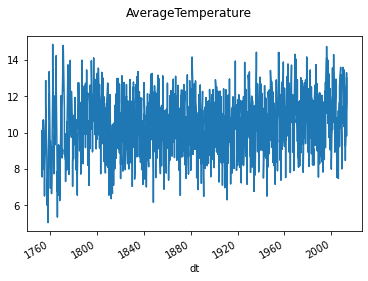

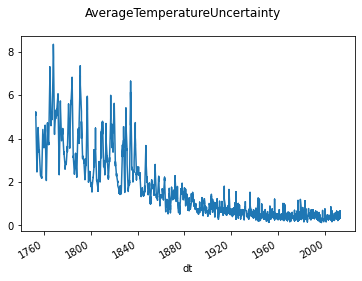

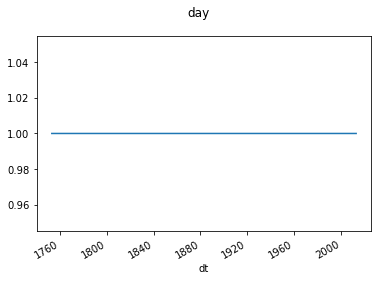

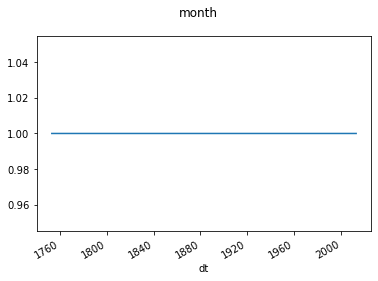

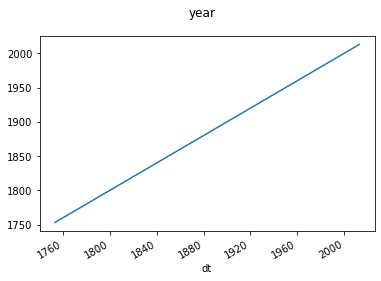

In [210]:
#visualisation de la série temporelle N°1
visualisation(ts1)

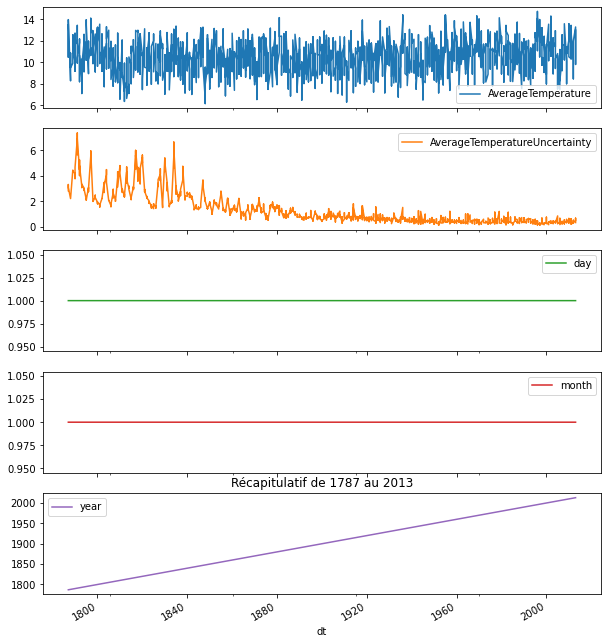

In [211]:
#visualisation de la série temporelle N°1 avec un filtre d'intervalle de temps
ts1['1787':'2013'].plot(subplots=True, figsize=(10,12))
plt.title("Récapitulatif de 1787 au 2013")
plt.savefig('stocks.png')
plt.show()

In [241]:
def visualisation(ts):
    cont_col = [col for col in ts.columns if ts[col].dtype != "O"]
    for e in cont_col:
        ts2[e].plot()
        plt.suptitle(e)
        plt.show()

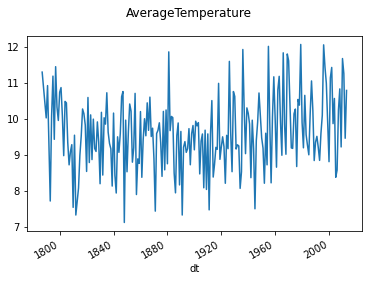

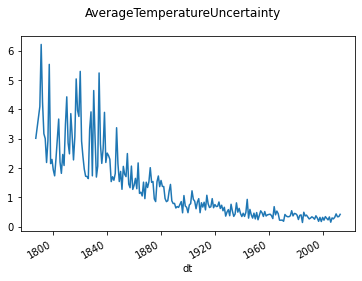

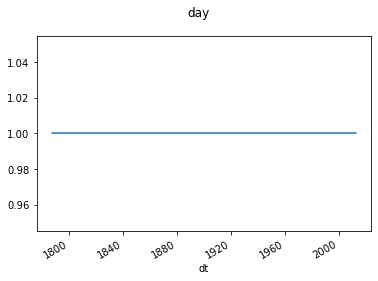

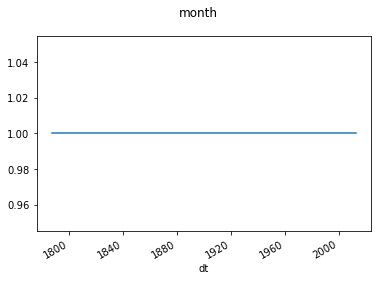

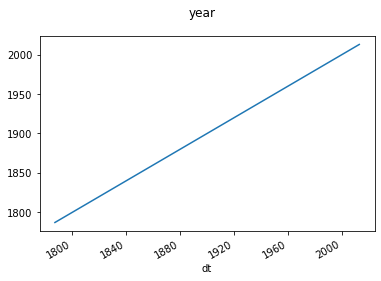

In [242]:
#visualisation de la série temporelle N°2
visualisation(ts2)

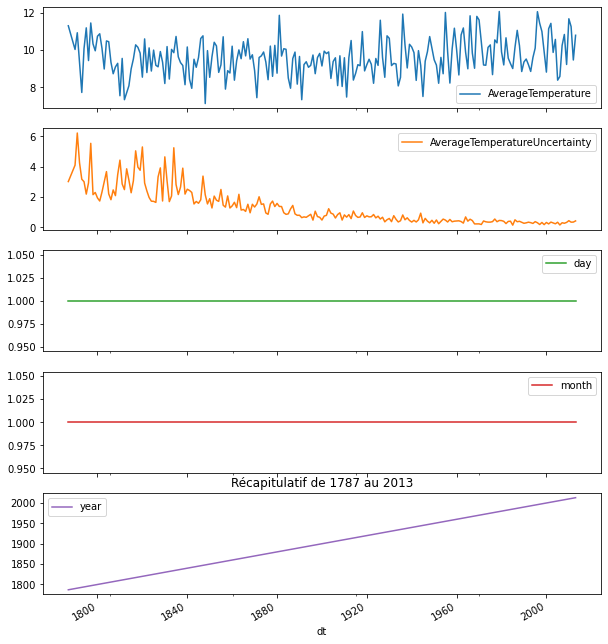

In [243]:
#visualisation de la série temporelle N°2 avec un filtre d'intervalle de temps
ts2['1787':'2013'].plot(subplots=True, figsize=(10,12))
plt.title("Récapitulatif de 1787 au 2013")
plt.savefig('stocks.png')
plt.show()

In [245]:
def visualisation(ts):
    cont_col = [col for col in ts.columns if ts[col].dtype != "O"]
    for e in cont_col:
        ts3[e].plot()
        plt.suptitle(e)
        plt.show()

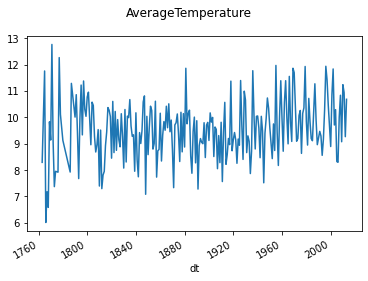

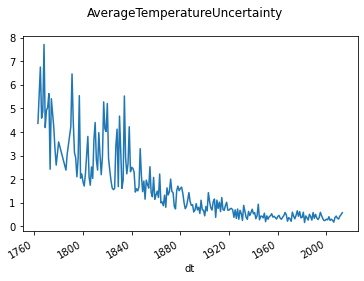

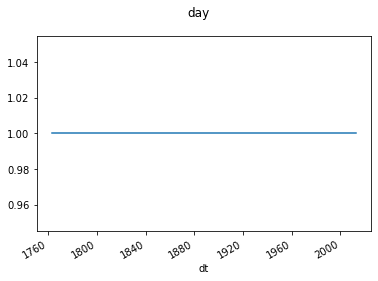

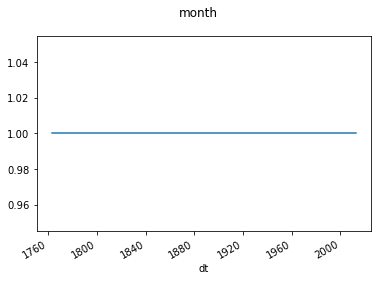

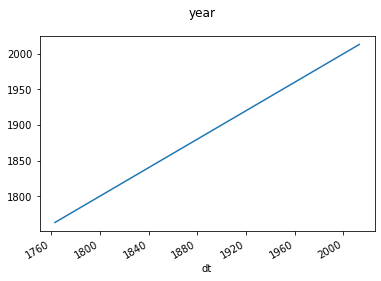

In [246]:
#visualisation de la série temporelle N°3
visualisation(ts3)

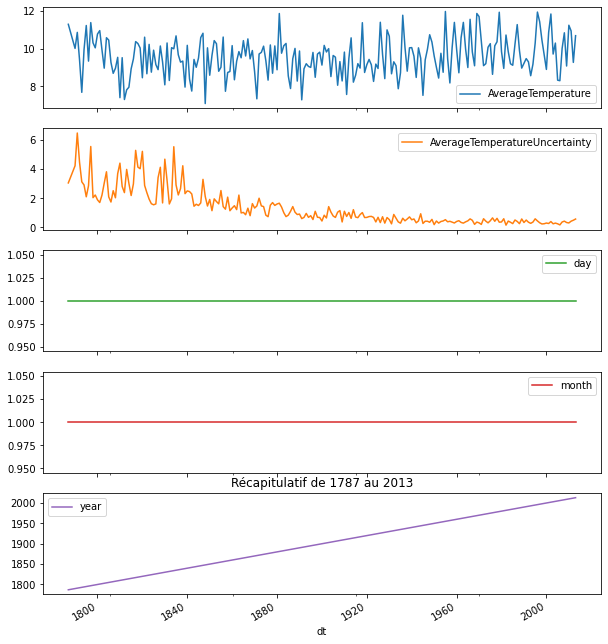

In [247]:
#visualisation de la série temporelle N°3 avec un filtre d'intervalle de temps
ts3['1787':'2013'].plot(subplots=True, figsize=(10,12))
plt.title("Récapitulatif de 1787 au 2013")
plt.savefig('stocks.png')
plt.show()

In [248]:
def visualisation(ts):
    cont_col = [col for col in ts.columns if ts[col].dtype != "O"]
    for e in cont_col:
        ts4[e].plot()
        plt.suptitle(e)
        plt.show()

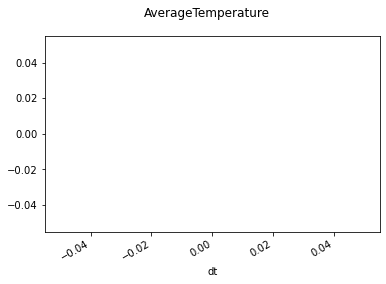

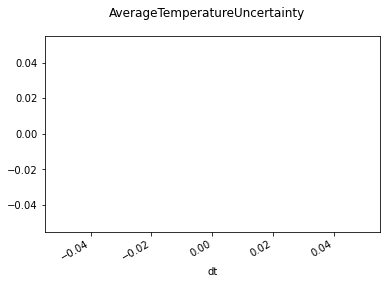

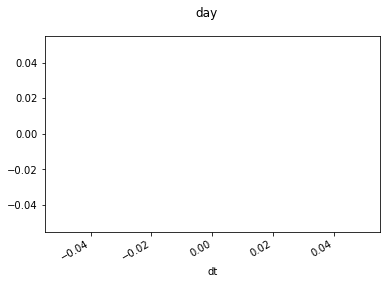

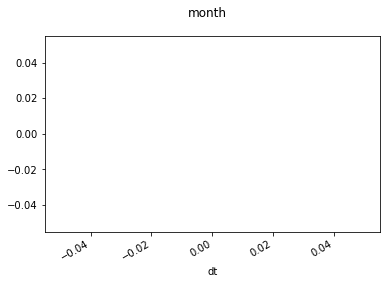

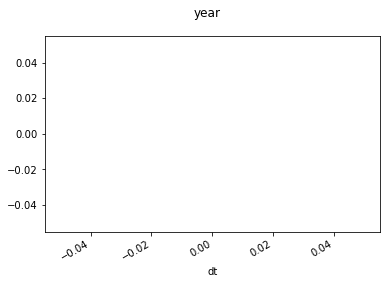

In [249]:
#visualisation de la série temporelle N°4
visualisation(ts4)

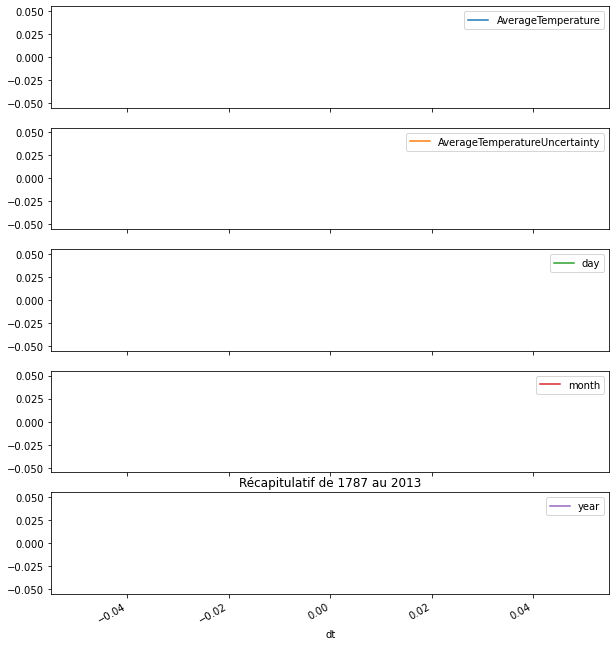

In [250]:
#visualisation de la série temporelle N°4 avec un filtre d'intervalle de temps
ts4['1787':'2013'].plot(subplots=True, figsize=(10,12))
plt.title("Récapitulatif de 1787 au 2013")
plt.savefig('stocks.png')
plt.show()

In [251]:
def visualisation(ts):
    cont_col = [col for col in ts.columns if ts[col].dtype != "O"]
    for e in cont_col:
        ts11[e].plot()
        plt.suptitle(e)
        plt.show()

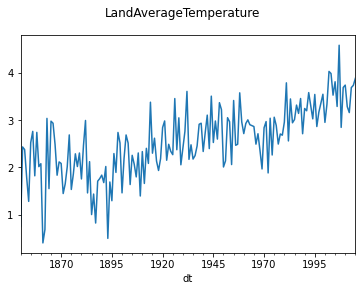

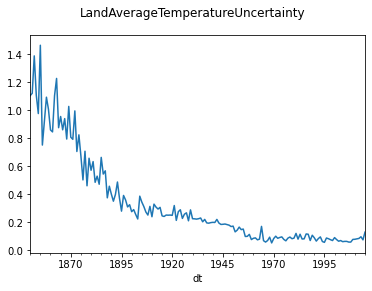

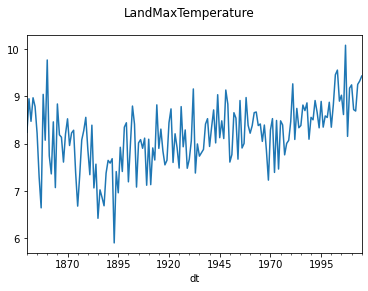

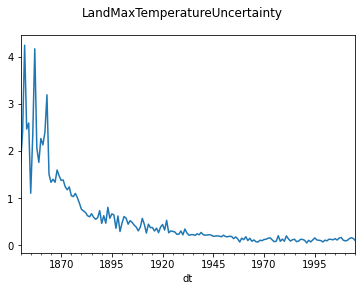

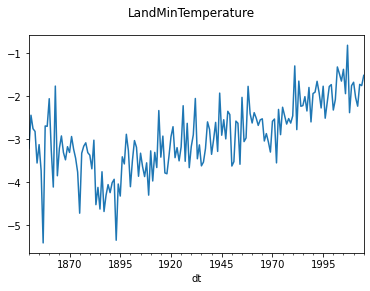

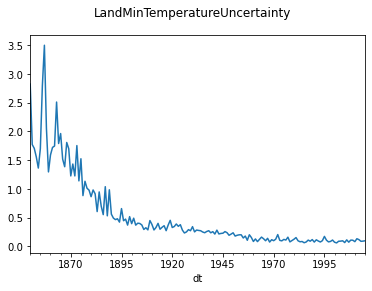

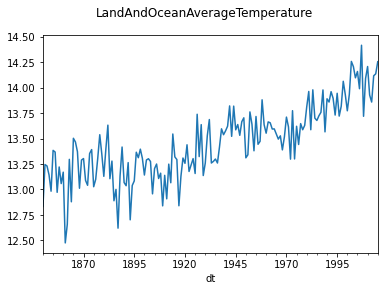

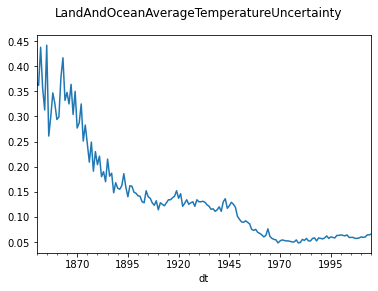

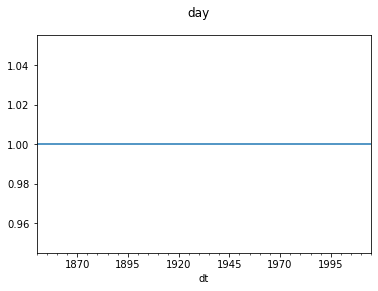

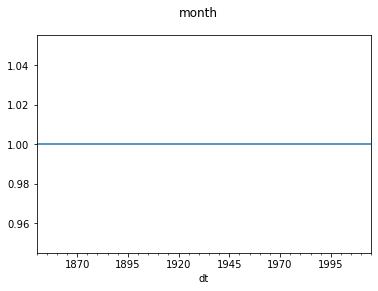

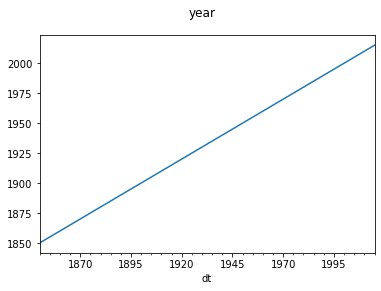

In [252]:
#visualisation de la série temporelle N°5
visualisation(ts11)

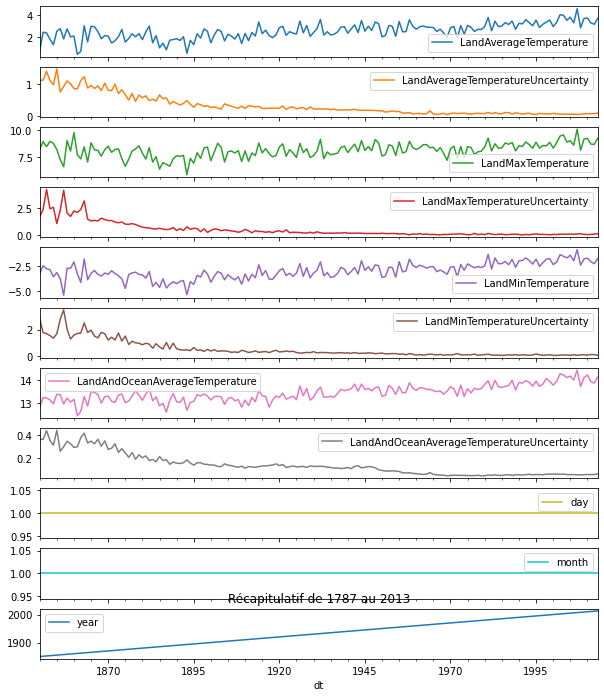

In [238]:
#visualisation de la série temporelle N°5 avec un filtre d'intervalle de temps
ts11['1787':'2013'].plot(subplots=True, figsize=(10,12))
plt.title("Récapitulatif de 1787 au 2013")
plt.savefig('stocks.png')
plt.show()

In [239]:

#from sklearn.model_selection import train_test_split
#train, test = train_test_split(df5, test_size=0.2, random_state = 42)

In [ ]:
#len(train)